# **Self-supervised Learning: Fashionset Classification**
## Advanced Topics in Machine Learning Project Report
University of Bern, 2019

## Goal of the project
The task we chose is classifying two fashion images datasets, the FashionMNIST dataset (https://github.com/zalandoresearch/fashion-mnist by Xiao et al.), comprising 70'000 images in 10 categories and the DeepFashion Dataset (http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html) which consists of approximately 290'000 images, separated in 50 categories. We performed the task with self-supervised learning and compared different approaches.

## Description of the methods

We implement different self-supervised methods with three different self-supervised tasks. We first train a CIFAR-Net network (based on TensorFlow's model, https://github.com/tensorflow/models/blob/master/research/slim/nets/cifarnet.py) for every sub-task using unlabeled images. Afterwards, we add a linear classifier on top of it, fine-tuned the whole model (as proposed in https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751) using labeled images and predict the images categories. Training for the sub-tasks and fine-tuning was made using the Cross-Entropy loss function, with Adam optimizers and decaying learning rates except for the auto encoder where we used the MSE loss function.   

Here are the three different sub-tasks.

- Rotation prediction (based on https://github.com/gidariss/FeatureLearningRotNet by Gidaris et al.). 
    Here, the CIFAR-Net network is trained to predict the rotation of an image. We then replace the last linear layer by two new layers that will serve as a classifier, and we use labeled images to fine-tune the network. The code is found in `rotation.py` .

- Discriminative feature learning with Exemplar CNN (based on https://arxiv.org/abs/1406.6909 by Dosovitskiy et al.)
    For this sub-task, each image gets six times transformed via either a horizontal flip, cropping, resized cropping, color jitter, rotation or affine transformation. These transformations of the sample image form a surrogate class with a new label. As for the other tasks, we then add a linear classifier and fine-tune the model. This sub-task is found under `exemplar_cnn.py` 

- Auto-Encoder: 
    We implemented an auto-encoder with following architecture: the CIFAR-Net model works as the encoder (as seen in `autoencoder.py`), we built the decoder accordingly (code is found in `decoder.py`). We first pretrain the encoder and the decoder together, and then fine-tune the encoder alone. Note that for this task, we do not have to add a classifier on top of the encoder as its final linear layer already has the correct size. 

In addition, we also directly trained our network with supervised learning to allow us to have a comparison with the self-supervised tasks. The code can be found under `supervised_deep_fashion.py`. 

Therefore, for each dataset, we can compare the three subtasks with supervised training and compare the accuracies. 

## Results

Here are the results of the different methods for the different subtasks: 

| Experiment | Dataset | Pretraining epochs | Pretraining lr | Finetuning epochs | Finetuning lr | Val accuracy | Test accuracy |
|:---|:---|---:|---:|---:|---:|---:|---:|
| Auto-encoder | Fashion MNIST | 15 | 0.01 | 15 | 0.001 | 68.39 | 67.70 |
| Auto-encoder | Fashion MNIST | 15 | 0.001 | 15 | 0.0001 | 88.63 | 87.96 |
| Auto-encoder | Fashion MNIST | 15 | 0.001 | 15 | 0.001 | 93.45 | **90.31** |
| Exemplar CNN | Fashion MNIST $^1$ | 15 | 0.01 | 15 | 0.001 | 78.87 | 78.37 |
| Exemplar CNN | Fashion MNIST $^1$ | 15 | 0.001 | 15 | 0.0001 | 71.372 | 71.67 |
| Exemplar CNN | Fashion MNIST $^1$ | 15 | 0.001 | 15 | 0.001 | 82.583 | **81.66** |
| Rotation Prediction | Fashion MNIST | 15 | 0.01 | 15 | 0.001 | 93.27 | 89.89 |
| Rotation Prediction | Fashion MNIST | 15 | 0.001 | 15 | 0.001 | 94.5 | **90.16** |
| Rotation Prediction | Fashion MNIST | 15 | 0.001 | 15 | 0.0001 | 90.54 | 89.01 |
| Supervised | Fashion MNIST | 15 | 0.001 | 15 | 0.001 | 93.772 | **90.33** |
| Supervised | Fashion MNIST | 15 | 0.01 | 15 | 0.001 | 92.95 | 89.67 |
| Supervised | Fashion MNIST | 15 | 0.001 | 15 | 0.0001 | 93.76 | **90.33** |
|---|---|---|---|---|---|---|---|
| Auto-encoder | Deep Fashion $^2$  | 15 | 0.01 | 15 | 0.001 | 43.50 | 42.55 |
| Exemplar CNN | Deep Fashion  | 15 | 0.01 | 15 | 0.01 | 26.28| 25.62 |
| Rotation Prediction | Deep Fashion $^2$ | 15 | 0.001 | 15 | 0.001 | 42.93 | 42.75 |
| Supervised | Deep Fashion $^3$ | 15 | 0.001 | 15 | 0.001 | 46.37 | **45.73** |



Notes about the experiments:

$^1$ The Exemplar CNN subtask was trained only with 6'000 images of the FashionMNIST dataset. 

$^2$ The Auto-encoder and Rotation Prediction subtasks only used a subset of the DeepFashion dataset: 60'000 train images and 20'000 images each for the validation and test 
set. 

$^3$ The supervised subtask used almost the complete DeepFashion dataset: 200'000 images for training, 40'000 images each for the validation and test set.

## Analysis

We tested each model with two different datasets as it is apparent in the *Results* section. The results of the FashionMNIST dataset are significantly better than those of the DeepFashion dataset. There are several reasons for that:
- The FashionMnist dataset has pretty similar pictures of clothes (further down are some pictures as examples). There is always a black background and white clothes. 
- The DeepFashion dataset is a lot different. There are different backgrounds, different models which pose in different angles and wear different clothes. 

We see that the DeepFashion dataset is way more complicated than the FashionMNIST one: all these factors of variation as poses, colors or models can distract the model, where as FashionMNIST is really uniform. Additionally we didn't use that many epochs (15) to learn. This means the network hasn't had much time to learn the different features which makes it harder to learn more complex images as effectively as the "easier" pictures of the FashionMNIST dataset. A potential change that could be made is about the model. All our experiments were made with the CIFAR-Net model. Some bigger models may be better suited to grasp the relative complexity of the DeepFashion dataset.

There were 4 different methods used: An auto-encoder, Exemplar CNN, Rotation Prediction and Supervised learning. 
Out of these four, the supervised learning approach performed very well in comparison with the other methods. The goal of the experiments was to prove that self-supervised methods are better than supervised models, which was sadly not achieved.
- The best result in the DeepFashion dataset was achieved with the supervised method.
- For the FashionMNIST dataset, three settings achieved very similar accuracies: the auto-encoder, the rotation prediction and the supervised method. All were in a span of 0.15%, the auto-encoder and the supervised method even have only 0.02% difference! Such a small value may very well not be significant at all. 

Even though the result of the self-supervised approach in the FashionMNIST dataset was as good as the supervised approach, we cannot conclude that the self-supervised methods yield better results. 

One must however not forget the potential benefits of self-supervised learning: in our case, we had two complete datasets to use... which may not be the case in every situation, as getting big amounts of labeled data often requires time and money investment. Therefore, self-supervised learning could use unlabeled data for pretraining and use fewer labeled data only for finetuning. 

### Example: FashionMNIST experiment

This experiment shows rather good results with our rotation prediction method. In the fourth picture (Accuracy Test Rotation FashionMNIST) the test accuracy is over 90% which is very good.
Additionally in the first picture (Loss rotation FashionMNIST) it is visible that the loss of the training and validation are constantly decreasing which shows a healthy trajectory where the likelihood of overfitting or underfitting is very low.

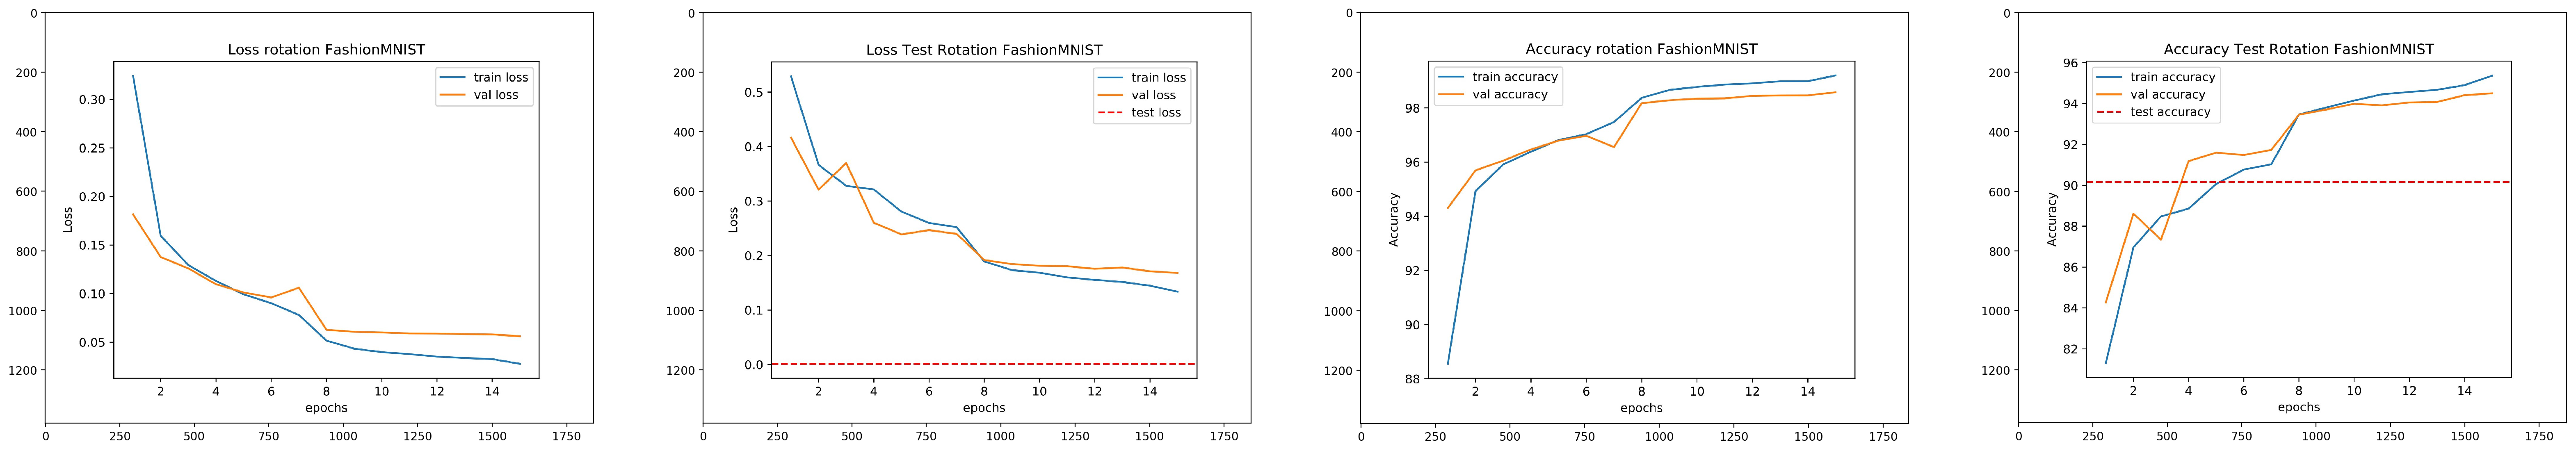

In [8]:
# Import some libraries, so we can display the pictures of the results
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
from PIL import Image

plot1 = Image.open('performance_plots/rot-deep-accuracy.jpg')
plot2 = Image.open('performance_plots/rot-deep-overfitting.jpg')
plot3 = Image.open('performance_plots/rot-deep-test-accuracy.jpg')
plot4 = Image.open('performance_plots/rot-deep-test.jpg')
plot5 = Image.open('performance_plots/rot-fashion-loss.jpg')
plot6 = Image.open('performance_plots/rot-fashion-loss-test.jpg')
plot7 = Image.open('performance_plots/rot-fashion-accuracy.jpg')
plot8 = Image.open('performance_plots/rot-fashion-accuracy-test.jpg')

deepfashion = [plot2,plot4,plot1,plot3]
fashionMNIST = [plot5, plot6, plot7, plot8]

plot_fig = plt.figure(figsize=(50, 45), dpi= 200, facecolor='w', edgecolor='k')
for i, img in enumerate(fashionMNIST):
    plot_fig.add_subplot(1, 5, i+1)
    plt.imshow(img) 
    
plt.show()

### Example: DeepFashion experiment

In this example there is a typical overfitting in the first image (Loss rotation DeepFashion) recognizable. The train loss always lowers itself while the validation loss stays stable. This also shows very good in the third picture (Accuracy rotation DeepFashion) where the accuracy of the training is very high while the validation accuracy stays rather low.
In the last picture (accuracy test rotation DeepFashion) the accuracy only achieves ~40% which is not very good.

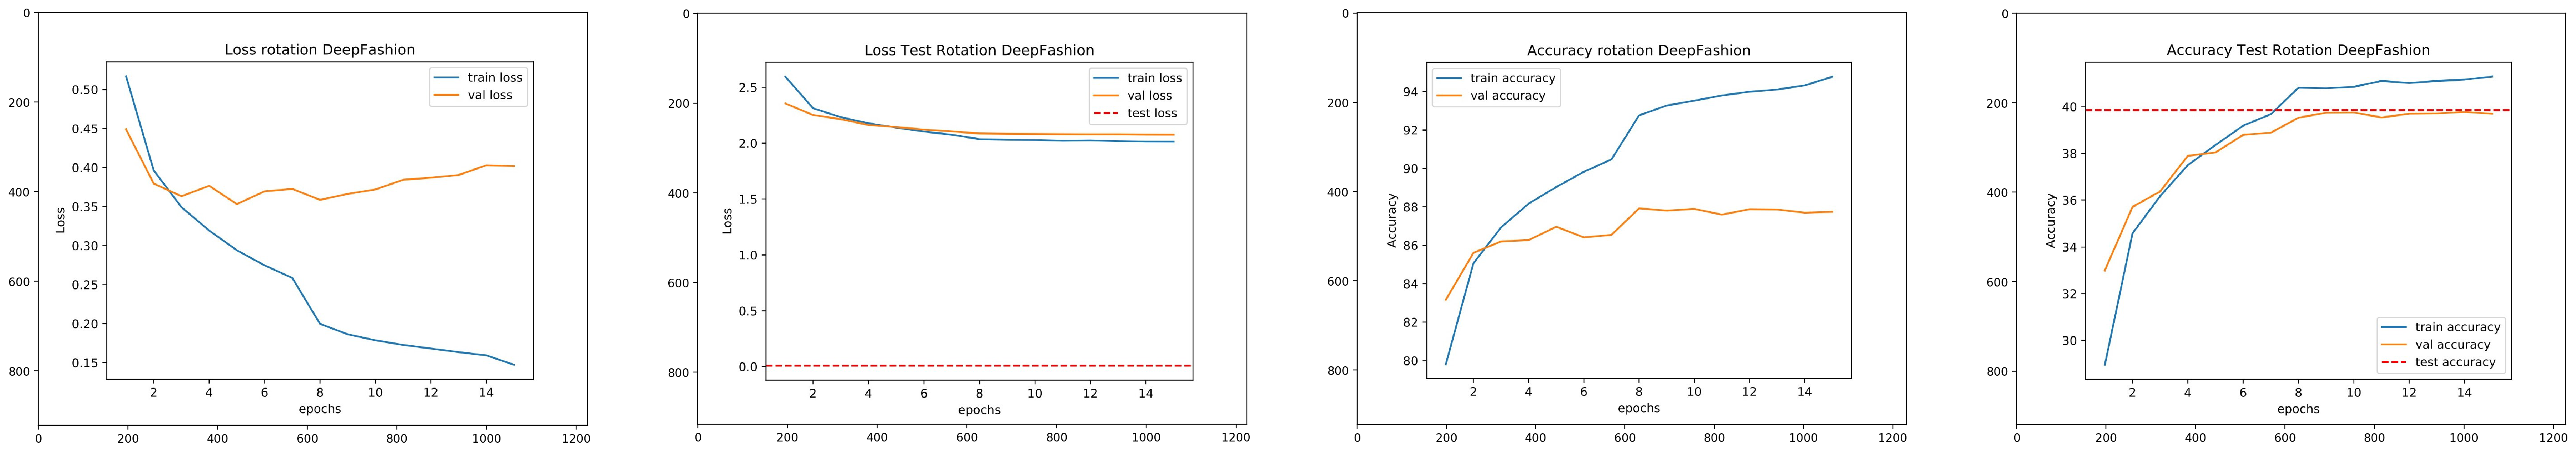

In [6]:
plot_fig = plt.figure(figsize=(50, 45), dpi= 200, facecolor='w', edgecolor='k')
for i, img in enumerate(deepfashion):
    plot_fig.add_subplot(1, 5, i+1)
    plt.imshow(img) 
    
plt.show()

## Examples of Use

You just need to download the DeepFashion dataset and place it in the root directory in a folder called `/img`. 

- The dataset can be found under: http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html.
- Where the following files need to be downloaded: the img.zip, list_category_img.txt and list_eval_partition.txt

After that the only thing you need to do is execute the main.py file. This will start the whole process.

1. The main.py file will then start the training of the different pretraining models.
2. After the training the model is finetuned.
3. In a final step we evalute each model with the testset of each dataset.

In each step we are able to plot the curves and to compare the results. These plots get saved in a folder named /Plot.

In [13]:
#load datasets
fashionmnist = torchvision.datasets.FashionMNIST('fashion_mnist/', train=True, transform=None, target_transform=None, download=False)
        


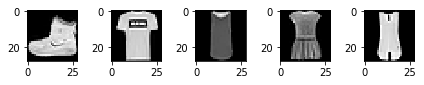

In [6]:
# here are some pictures of the fashionMNIST dataset
fig = plt.figure()
for i in range (len(fashionmnist)):
    sampleImg = fashionmnist[i][0]
    fig.add_subplot(1,5,i+1)
    plt.imshow(sampleImg, cmap='gray')
    plt.tight_layout()
    if i == 4:   
        plt.show()  
        break

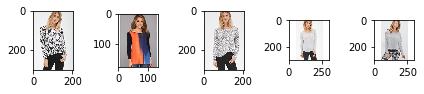

In [4]:
# here are some pictures of the DeepFashion dataset
# in the dataloader they all get scaled to the size of 32x32 pixel

image1 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000001.jpg')
image2 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000002.jpg')
image3 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000003.jpg')
image4 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000004.jpg')
image5 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000005.jpg')
deepfashion = [image1, image2, image3, image4, image5]

fig1 = plt.figure()
for i, img in enumerate(deepfashion):
    fig1.add_subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')    
    plt.tight_layout()

plt.show()


The example shown below is the rotation prediction method. The other three methods are built and called pretty similiar, so there is no need to show all of them. The rotation prediction starts with:
- Calling the CifarNet model.
- Define the loss, optimizer and scheduler.
- Train the network

```python
def train_rotation_net():
    """Trains the rotation model."""
    print("=============================================================")
    print("========== Train Rotation Model with FashionMNIST ===========")
    print("=============================================================\n")

    model = CifarNet(input_channels=1, num_classes=4)
    model = model.to(DEVICE)

    loss_fn = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE_TRAIN)

    # Decay LR by a factor of GAMMA
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=STEP_SIZE_TRAIN, gamma=GAMMA)

    return train(model, loss_fn, optimizer, scheduler, EPOCHS, train_loader_fashion_mnist, val_loader_fashion_mnist)

```

Our model, called CifarNet is built like this:

```python
class CifarNet(nn.Module):
    """CifarNet model"""

    def __init__(self, input_channels, num_classes=10):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=(5, 5), bias=False)
        self.max1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.batch1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(5, 5), bias=False)
        self.batch2 = nn.BatchNorm2d(num_features=64)
        self.max2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.flat = flatten
        self.fc1 = nn.Linear(1600, 384, bias=True)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(384, 192, bias=True)
        self.fc3 = nn.Linear(192, num_classes, bias=True)

    def forward(self, x):
        out = self.conv1(x)
        out = self.max1(out)
        out = self.batch1(out)
        out = self.conv2(out)
        out = self.batch2(out)
        out = self.max2(out)
        out = self.flat(out)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
```

After the training it is necessary that we finetune the model before we test it with the Deepfashion dataset:
- We define the loss function, optimizer and scheduler again
- Replace the last linear layer `self.fc3` by two fully connected layers 
- In the last step we call the fine tuning function. 


    
```python
def fine_tune_rotation_model(model):
    """Fine tunes the rotation model."""
    print("=============================================================")
    print("======== Fine Tune Rotation Model with FashionMNIST =========")
    print("=============================================================\n")

    # use this to train only the last fully connected layer
    # for param in model.parameters():
    #     param.requires_grad = False

    # for param in model.fc3.parameters():
    #     param.requires_grad = True

    # replace fc layer with 10 outputs
    model.fc3 = nn.Sequential(nn.Linear(192, 192),
                              nn.Linear(192, 10, bias=True)
                              )

    loss_fn = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE_FINE_TUNE, weight_decay=WEIGHT_DECAY)

    # Decay LR by a factor of GAMMA
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=STEP_SIZE_FINE_TUNE, gamma=GAMMA)

    model = model.to(DEVICE)
    return fine_tune(model, loss_fn, optimizer, scheduler, EPOCHS_FINE_TUNE, train_loader_fashion_mnist,
                     val_loader_fashion_mnist)

```



All that is left in the final step is to test the trained model on a testset for classification purposes. We keep the same loss function and call the function from `test.py`

```python
def test_classification_on_rotation_model(model):
    """Tests the rotation model."""
    print("=============================================================")
    print("== Test Classification on Rotation Model with FashionMNIST ==")
    print("=============================================================\n")

    loss_fn = nn.CrossEntropyLoss()
    model = model.to(DEVICE)
    return test(model, loss_fn, test_loader_fashion_mnist)
```